In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# NNAntisparse

In [3]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")

In [4]:
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results
# table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [5]:
# df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax2') & (df_nnanti_results['rho'] == 0.8)]['SINR'].hist()

In [6]:
# df_nnanti_results.loc[df_nnanti_results['SINR'] == -999]

In [7]:
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results

In [8]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRNSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)

# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'NSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [9]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.iloc[-20:]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [10]:
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,NSM,ICA,LDMI,PMF
0,0.0,27.244685,27.871744,28.165488,29.542237,23.838138,31.393648,29.839121
1,0.1,27.502785,27.967012,28.172274,23.140114,19.949051,31.372895,29.950132
2,0.2,27.486791,27.884511,27.885992,17.568544,15.730983,31.521691,29.732986
3,0.3,27.322740,27.598665,27.469186,13.714490,12.771990,31.453127,29.592594
4,0.4,27.581375,27.589904,27.522128,10.876288,10.530696,31.975688,30.025220
5,0.5,27.032967,26.826423,26.417667,8.194453,8.563726,31.661239,29.497131
6,0.6,26.492704,25.991164,25.302152,5.700218,6.825230,31.538139,29.453701
7,0.7,25.205596,23.914650,22.651065,4.359822,3.698915,31.455187,29.206181
8,0.8,20.803054,19.144516,17.670144,2.959925,3.995689,30.189740,28.046089


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


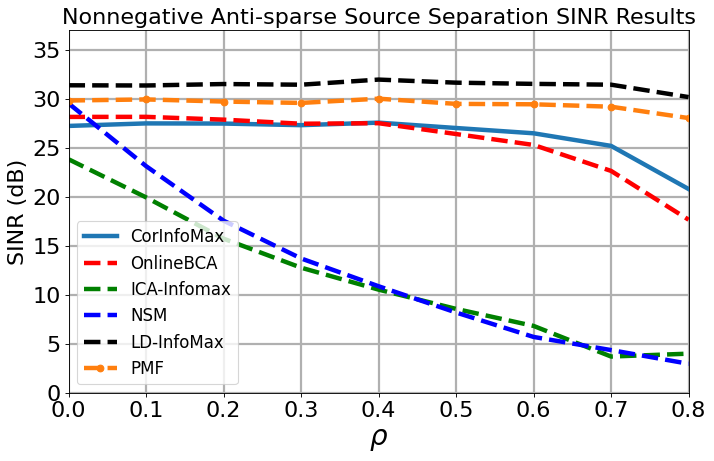

In [11]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxNNAntisparse_Correlated.pdf', format='pdf')

In [12]:
results.loc[results['Model'] == 'CorInfoMax']

,Model,rho,count,SINR
0,CorInfoMax,0.0,100,27.244685
1,CorInfoMax,0.1,100,27.502785
2,CorInfoMax,0.2,100,27.486791
3,CorInfoMax,0.3,100,27.322740
4,CorInfoMax,0.4,100,27.581375
5,CorInfoMax,0.5,100,27.032967
6,CorInfoMax,0.6,100,26.492704
7,CorInfoMax,0.7,100,25.205596
8,CorInfoMax,0.8,100,20.803054


# Antisparse

In [13]:
# df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV1.pkl")

In [14]:
# df_anti_results

In [15]:
# results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results.loc[results['Model'] == 'CorInfoMax2']

# table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [16]:
# df_anti_results.loc[df_anti_results['SINR'] == -999]

In [17]:
# results.loc[results['Model'] == 'OnlineBCA']

In [18]:
# results = df_anti_results.loc[df_anti_results['SINR'] != -999][['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

In [19]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRBSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'BSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [20]:
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
df_anti_results = df_anti_results.loc[(df_anti_results['SINR'] != -999)]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [21]:
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,BSM,ICA,LDMI,PMF
0,0.0,24.709056,24.044864,25.668309,25.370583,29.643275,29.479405,29.510854
1,0.1,24.781422,24.103222,25.551283,18.724845,21.523834,29.651073,29.549875
2,0.2,24.697136,23.927696,25.141833,13.685154,16.348270,28.798253,29.262811
3,0.3,24.170905,23.167890,24.405175,10.353487,13.109831,28.259328,28.794440
4,0.4,23.632991,22.761455,23.601887,7.914876,10.715336,28.257939,28.614109
5,0.5,23.257116,22.877828,23.026719,5.811517,8.729421,25.787159,28.206243
6,0.6,23.285941,22.703955,22.392018,3.957891,6.961358,23.832697,28.014322
7,0.7,22.323396,22.204172,21.017993,2.164253,3.564699,16.810293,26.995702
8,0.8,21.421071,21.469299,19.603393,0.253840,4.015459,9.736812,25.576452


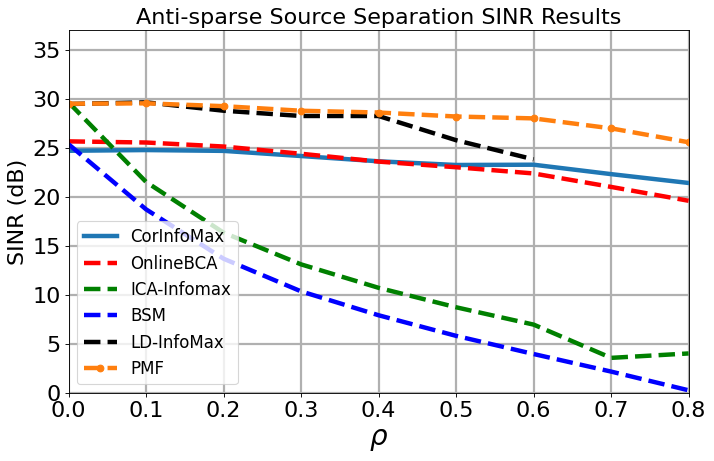

In [22]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAntisparse_Correlated.pdf', format='pdf')

In [23]:
results.loc[results['Model'] == "LDMI"]

,Model,rho,count,SINR
36,LDMI,0.0,100,29.479405
37,LDMI,0.1,100,29.651073
38,LDMI,0.2,100,28.798253
39,LDMI,0.3,100,28.259328
40,LDMI,0.4,100,28.257939
41,LDMI,0.5,100,25.787159
42,LDMI,0.6,100,23.832697
43,LDMI,0.7,100,16.810293
44,LDMI,0.8,100,9.736812
